In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [84]:
lutas_df = pd.read_csv('database/masterdataframe.csv', parse_dates=True)
lutadores_df = pd.read_csv('database/pro_mma_fighters.csv')
coordenadas = pd.read_csv('database/countries.csv', encoding='ISO-8859-1')

In [85]:
coordenadas

,latitude,longitude,name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla
...,...,...,...
240,15.552727,48.516388,Yemen
241,-12.827500,45.166244,Mayotte
242,-30.559482,22.937506,South Africa
243,-13.133897,27.849332,Zambia


In [86]:
lutadores_df

,url,fighter_name,nickname,birth_date,age,death_date,location,country,height,weight,...,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
0,/fighter/Kharun-Atlangeriev-167431,Kharun Atlangeriev,Predator,05/10/1992,28.0,NaN,NaN,Russia,"5'10""",155 lbs,...,11,5,5,1,NaN,11,0,1,1,NaN
1,/fighter/Shojin-Miki-157565,Shojin Miki,Mini Margarito,NaN,NaN,NaN,"Honolulu, Hawaii",United States,"5'9""",125 lbs,...,6,2,4,0,NaN,6,2,0,5,NaN
2,/fighter/Ryan-Keenan-33827,Ryan Keenan,Who Dat?,15/06/1985,36.0,NaN,"Windermere, Florida",United States,"6'0""",155 lbs,...,6,3,3,0,NaN,6,1,1,0,NaN
3,/fighter/Dustin-Jacoby-73825,Dustin Jacoby,The Hanyak,04/04/1988,33.0,NaN,"Arenzville, Illinois",United States,"6'4""",205 lbs,...,14,9,1,4,NaN,14,1,2,2,NaN
4,/fighter/Richardson-Moreira-72825,Richardson Moreira,Rick Monstro,31/03/1984,37.0,NaN,"Campinas, Sao Paulo",Brazil,"6'2""",205 lbs,...,8,2,5,1,NaN,8,1,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,/fighter/Bas-Rutten-214,Bas Rutten,El Guapo,24/02/1965,56.0,NaN,Eindhoven,Netherlands,"6'1""",205 lbs,...,28,11,14,4,NaN,28,0,3,1,NaN
5147,/fighter/Jason-Dent-8321,Jason Dent,Dynamite,12/06/1980,41.0,NaN,"Cincinnati, Ohio",United States,"5'10""",158 lbs,...,22,3,19,0,NaN,22,2,2,9,NaN
5148,/fighter/Carlos-Felipe-185021,Carlos Felipe,Boi,12/01/1995,26.0,NaN,"Feira de Santana, Bahia",Brazil,"6'0""",263 lbs,...,11,6,0,5,NaN,11,0,0,1,NaN
5149,/fighter/Kyle-Crutchmer-296007,Kyle Crutchmer,NaN,05/05/1993,28.0,NaN,"Tulsa, Oklahoma",United States,"5'8""",170 lbs,...,7,1,3,3,NaN,7,0,0,1,NaN


In [87]:
lutadores_ufc = pd.DataFrame(lutas_df.drop_duplicates("fighter")["fighter"])

In [88]:
lutadores_geo = lutadores_ufc.merge(lutadores_df[["fighter_name", "country"]], left_on="fighter", right_on= "fighter_name", how='left').drop(columns = ['fighter_name'])
lutadores_geo = lutadores_geo.merge(coordenadas, left_on='country', right_on='name', how='left').drop(columns = ['name'])
lutadores_geo=lutadores_geo.dropna()

In [89]:
import folium
from folium.plugins import MarkerCluster

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(lutadores_geo)):
        lat = lutadores_geo.iloc[i]['latitude']
        long = lutadores_geo.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {}<br>
                    fighter : {}<br>"""
        popup_text = popup_text.format(lutadores_geo.iloc[i]['country'],
                                   lutadores_geo.iloc[i]['fighter']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

world_map

In [90]:
idh_paises = pd.read_csv('database/idh_and_region.csv')

In [98]:
lutadores_df

,url,fighter_name,nickname,birth_date,age,death_date,location,country,height,weight,...,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
0,/fighter/Kharun-Atlangeriev-167431,Kharun Atlangeriev,Predator,05/10/1992,28.0,NaN,NaN,Russia,"5'10""",155 lbs,...,11,5,5,1,NaN,11,0,1,1,NaN
1,/fighter/Shojin-Miki-157565,Shojin Miki,Mini Margarito,NaN,NaN,NaN,"Honolulu, Hawaii",United States,"5'9""",125 lbs,...,6,2,4,0,NaN,6,2,0,5,NaN
2,/fighter/Ryan-Keenan-33827,Ryan Keenan,Who Dat?,15/06/1985,36.0,NaN,"Windermere, Florida",United States,"6'0""",155 lbs,...,6,3,3,0,NaN,6,1,1,0,NaN
3,/fighter/Dustin-Jacoby-73825,Dustin Jacoby,The Hanyak,04/04/1988,33.0,NaN,"Arenzville, Illinois",United States,"6'4""",205 lbs,...,14,9,1,4,NaN,14,1,2,2,NaN
4,/fighter/Richardson-Moreira-72825,Richardson Moreira,Rick Monstro,31/03/1984,37.0,NaN,"Campinas, Sao Paulo",Brazil,"6'2""",205 lbs,...,8,2,5,1,NaN,8,1,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,/fighter/Bas-Rutten-214,Bas Rutten,El Guapo,24/02/1965,56.0,NaN,Eindhoven,Netherlands,"6'1""",205 lbs,...,28,11,14,4,NaN,28,0,3,1,NaN
5147,/fighter/Jason-Dent-8321,Jason Dent,Dynamite,12/06/1980,41.0,NaN,"Cincinnati, Ohio",United States,"5'10""",158 lbs,...,22,3,19,0,NaN,22,2,2,9,NaN
5148,/fighter/Carlos-Felipe-185021,Carlos Felipe,Boi,12/01/1995,26.0,NaN,"Feira de Santana, Bahia",Brazil,"6'0""",263 lbs,...,11,6,0,5,NaN,11,0,0,1,NaN
5149,/fighter/Kyle-Crutchmer-296007,Kyle Crutchmer,NaN,05/05/1993,28.0,NaN,"Tulsa, Oklahoma",United States,"5'8""",170 lbs,...,7,1,3,3,NaN,7,0,0,1,NaN


In [106]:
lutadores_idh = idh_paises.merge(lutadores_df, left_on="Entity", right_on= "country", how='left').drop(columns = ['Entity'])

In [108]:
lutadores_idh.head()

,Code,Year,Human Development Index,Region,url,fighter_name,nickname,birth_date,age,death_date,...,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
0,AFG,1997,0.330,Asia,/fighter/Nasrat-Haqparast-122581,Nasrat Haqparast,NaN,22/08/1995,25.0,NaN,...,13,9,0,4,NaN,13,1,1,1,NaN
1,AFG,1997,0.330,Asia,/fighter/Ahmad-Qais-Jasoor-244049,Ahmad Qais Jasoor,NaN,NaN,NaN,NaN,...,5,2,2,1,NaN,5,1,1,0,NaN
2,AFG,1997,0.330,Asia,/fighter/Siyar-Bahadurzada-5453,Siyar Bahadurzada,The Great,17/04/1984,37.0,NaN,...,24,14,6,4,NaN,24,0,2,6,NaN
3,AFG,1998,0.329,Asia,/fighter/Nasrat-Haqparast-122581,Nasrat Haqparast,NaN,22/08/1995,25.0,NaN,...,13,9,0,4,NaN,13,1,1,1,NaN
4,AFG,1998,0.329,Asia,/fighter/Ahmad-Qais-Jasoor-244049,Ahmad Qais Jasoor,NaN,NaN,NaN,NaN,...,5,2,2,1,NaN,5,1,1,0,NaN


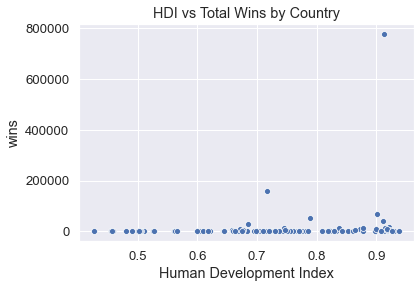

In [109]:
country_performance = lutadores_idh.groupby('country').agg({'wins': 'sum', 'Human Development Index': 'mean'}).reset_index()

# Plot
sns.scatterplot(data=country_performance, x='Human Development Index', y='wins')
plt.title('HDI vs Total Wins by Country')
plt.show()

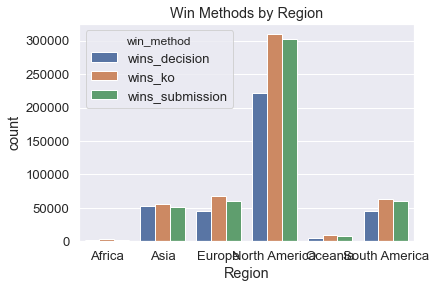

In [111]:
wins_methods = lutadores_idh.melt(id_vars=['Region'], value_vars=['wins_ko', 'wins_submission', 'wins_decision'], var_name='win_method', value_name='count')

# Group by region and win method
region_win_methods = wins_methods.groupby(['Region', 'win_method']).sum().reset_index()

# Plot
sns.barplot(data=region_win_methods, x='Region', y='count', hue='win_method')
plt.title('Win Methods by Region')
plt.show()

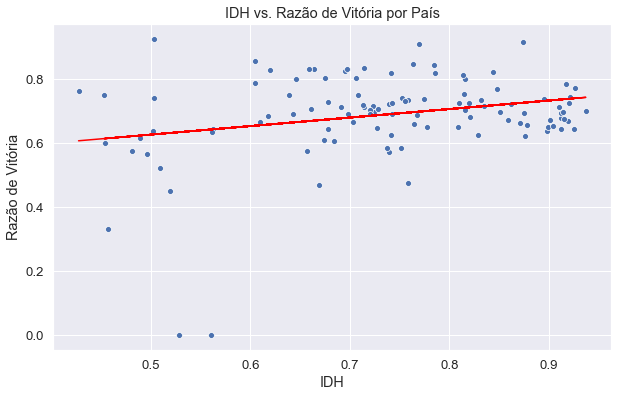

Correlation between HDI and win rate: 0.262


In [148]:
performance_by_country = lutadores_idh.groupby(['country', 'Human Development Index']).agg({
    'losses_ko': 'sum',
    'losses_submission': 'sum',
    'losses_decision': 'sum',
    'wins_ko': 'sum',
    'wins_submission': 'sum',
    'wins_decision': 'sum'
}).reset_index()

# Calculate win rate
performance_by_country['win_rate'] = (performance_by_country['wins_ko'] +performance_by_country['wins_submission'] + performance_by_country['wins_decision']) / (performance_by_country['wins_ko'] +performance_by_country['wins_submission'] + performance_by_country['wins_decision'] + performance_by_country['losses_ko'] +performance_by_country['losses_submission'] + performance_by_country['losses_decision'])

perf_agg = performance_by_country.groupby('country').agg({'win_rate': 'mean', 'Human Development Index': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=perf_agg, x='Human Development Index', y='win_rate')

# fit a line to the data using numpy and plot the line
m, b = np.polyfit(perf_agg['Human Development Index'], perf_agg['win_rate'], 1)
plt.plot(perf_agg['Human Development Index'], m * perf_agg['Human Development Index'] + b, color='red')

plt.title('IDH vs. Razão de Vitória por País')
plt.xlabel('IDH')
plt.ylabel('Razão de Vitória')
plt.show()

correlation = perf_agg['Human Development Index'].corr(perf_agg['win_rate'])
print(f"Correlation between HDI and win rate: {correlation:.3f}")